Initialize and Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk,json
from sklearn.model_selection import train_test_split
import math
import ast
import os
import sys
sys.setrecursionlimit(3000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U bnlp_toolkit
from bnlp import POS
bn_pos = POS()
model_path_pos = "/content/drive/MyDrive/Text Summarization Thesis/Models/bn_pos.pkl"
!pip install bnltk
from bnlp import BengaliWord2Vec

from bnltk.tokenize import Tokenizers
tokenModel = Tokenizers()

!pip install rouge
import rouge
rouge = rouge.Rouge()

!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dataset Load

In [ ]:
!gdown --id 1si8Wuj1GZkZOipGWbeZ3CJNsp1hEuu3y
data = pd.read_csv('/content/dataset.csv',encoding='utf-8')
data

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1si8Wuj1GZkZOipGWbeZ3CJNsp1hEuu3y
To: /content/dataset.csv
100% 7.65M/7.65M [00:00<00:00, 128MB/s]


,No,Category,Documents,Summary_1,Summary_2,Summary_3
0,1,Accident,নারায়ণগঞ্জের রূপগঞ্জে হাসেম ফুড কারখানায় আগুনে...,নারায়ণগঞ্জের রূপগঞ্জে হাসেম ফুড কারখানায় আগুনে...,নারায়ণগঞ্জের রূপগঞ্জে হাসেম ফুড কারখানায় আগুনে...,নারায়ণগঞ্জের রূপগঞ্জে হাসেম ফুড কারখানায় আগুনে...
1,2,Accident,নারায়ণগঞ্জের রূপগঞ্জে সজীব গ্রুপের অঙ্গ-প্রতিষ...,নারায়ণগঞ্জের রূপগঞ্জে সজীব গ্রুপের অঙ্গ-প্রতিষ...,নারায়ণগঞ্জের রূপগঞ্জে সজীব গ্রুপের অঙ্গ-প্রতিষ...,নারায়ণগঞ্জের রূপগঞ্জে সজীব গ্রুপের অঙ্গ-প্রতিষ...
2,3,Accident,কক্সবাজারের চকরিয়ায় খেলতে গিয়ে মাতামুহুরি নদীর...,কক্সবাজারের চকরিয়ায় খেলতে গিয়ে মাতামুহুরি নদীর...,কক্সবাজারের চকরিয়ায় খেলতে গিয়ে মাতামুহুরি নদীর...,কক্সবাজারের চকরিয়ায় খেলতে গিয়ে মাতামুহুরি নদীর...
3,4,Accident,গাজীপুরে কাভার্ড ভ্যানের ধাক্কায় নিহত ১\nগাজীপ...,গাজীপুর সদর উপজেলায় একটি কাভার্ড ভ্যানের পেছনে...,গাজীপুরে কাভার্ড ভ্যানের ধাক্কায় নিহত ১\nগাজীপ...,গাজীপুর সদর উপজেলায় একটি কাভার্ড ভ্যানের পেছনে...
4,5,Accident,বগুড়ার শেরপুরে মোটরসাইকেলের ধাক্কায় এক নারী ...,বগুড়ার শেরপুরে মোটরসাইকেলের ধাক্কায় এক নারী ...,বগুড়ার শেরপুরে মোটরসাইকেলের ধাক্কায় এক নারী ...,বগুড়ার শেরপুরে মোটরসাইকেলের ধাক্কায় এক নারী ...
...,...,...,...,...,...,...
955,956,Sports,ভারতের বিদায়ি কোচ রবি শাস্ত্রীর সঙ্গে বিদায়ি ট...,ভারতের বিদায়ি কোচ রবি শাস্ত্রীর সঙ্গে বিদায়ি ট...,ভারতের বিদায়ি কোচ রবি শাস্ত্রীর সঙ্গে বিদায়ি ট...,ভারতের বিদায়ি কোচ রবি শাস্ত্রীর সঙ্গে বিদায়ি ট...
956,957,Sports,এবারের টি ২০ বিশ্বকাপে ভারত-পাকিস্তান ম্যাচ দে...,এবারের টি ২০ বিশ্বকাপে ভারত-পাকিস্তান ম্যাচ দে...,এবারের টি ২০ বিশ্বকাপে ভারত-পাকিস্তান ম্যাচ দে...,এবারের টি ২০ বিশ্বকাপে ভারত-পাকিস্তান ম্যাচ দে...
957,958,Sports,১২ বছর আগে প্রাণের ক্লাব ছেড়ে চলে গিয়েছিলেন ক্...,১২ বছর আগে প্রাণের ক্লাব ছেড়ে চলে গিয়েছিলেন ক্...,১২ বছর আগে প্রাণের ক্লাব ছেড়ে চলে গিয়েছিলেন ক্...,১২ বছর আগে প্রাণের ক্লাব ছেড়ে চলে গিয়েছিলেন ক্...
958,959,Sports,রোহিত শর্মাই ভারতীয় টি ২০ দলের নতুন অধিনায়ক হল...,রোহিত শর্মাই ভারতীয় টি ২০ দলের নতুন অধিনায়ক হল...,রোহিত শর্মাই ভারতীয় টি ২০ দলের নতুন অধিনায়ক হল...,রোহিত শর্মাই ভারতীয় টি ২০ দলের নতুন অধিনায়ক হল...


DataSet Distribution

Total number of headlines: 960


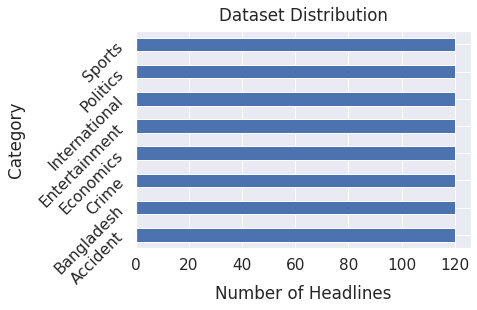

In [ ]:
print(f'Total number of headlines: {len(data)}')
sns.set(font_scale=1.4)
data['Category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Headlines", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Dataset Cleaning

In [ ]:

def cleaning_data(passage):
  
  pattern = "।?!"
  passage = re.sub('[A-z]','',passage)
  passage = re.sub(pattern,'',passage)
  passage = passage.split('\n')
  val  = ""
  for x in passage :
    x = x.lstrip()
    if len(x)!=0:
      val+= x+'\n'
  val = val.replace('\\',"");
  return val


# Apply the function into the dataframe
data['cleaned'] = data['Documents'].apply(cleaning_data)  


# print some cleaned reviews from the dataset
sample_data = [0,50,100,200,300,350,400,450,500,600,650,700,750,800,959]
for i in sample_data:
  print('Original: ',data.Documents[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:--> ',data.Category[i],'\n')

Original:  নারায়ণগঞ্জের রূপগঞ্জে হাসেম ফুড কারখানায় আগুনে পুড়ে নিহত আরও ২১ জনের লাশ স্বজনদের কাছে হস্তান্তর করা হয়েছে
শনিবার দুপুরে ঢাকা মেডিকেল কলেজ হাসপাতালের মর্গ থেকে লাশগুলো হস্তান্তর করা হয়
এর আগে গত বুধবার ২৪ জনের লাশ হস্তান্তর করা হয়
এ নিয়ে মোট ৪৫ জন শ্রমিকের লাশ স্বজনের কাছে বুঝিয়ে দেওয়া হলো
পুলিশের অপরাধ তদন্ত বিভাগের (সিআইডি) বিশেষ পুলিশ সুপার রোমানা আক্তার গণমাধ্যমকে এ তথ্য নিশ্চিত করেছেন
তিনি বলেন, গত বুধবার শনাক্ত হওয়া ২৪টি মরদেহ স্বজনদের কাছে হস্তান্তর করা হয়েছে
আজ শনিবার ২১টি মরদেহ স্বজনদের কাছে হস্তান্তর করা হলো
রোমানা আক্তার আরও বলেন, ডিএনএ পরীক্ষায় ৪৫ জনের পরিচয় শনাক্ত হয়েছে
বাকি লাশের ডিএনএ পরীক্ষার কাজ চলছে
গত ৮ জুলাই হাসেম ফুডস কারখানায় অগ্নিকাণ্ডের ওই ঘটনায় অন্তত ৫১ জনের মৃত্যু হয়
এর মধ্যে তিনজনের লাশ তখনই স্বজনদের কাছে হস্তান্তর করা হয়
বাকি লাশগুলো পুড়ে গিয়েছিল
সেগুলো শনাক্ত করার উপায় ছিল না
ফলে ডিএনএ পরীক্ষার মাধ্যমে পরিচয় শনাক্তের জন্য লাশগুলো ঢাকা মেডিকেল কলেজ হাসপাতাল মর্গে পাঠানো হয়
৪৮টি মৃতদেহ শনাক্ত করার জন্য ৬৮ জন স্বজনের কাছ থেকে ডিএনএ নমুনা সংগ্রহ

Dataset PreProcessing

In [ ]:

def PreProcessing(passage):
  
  pattern = "।?!"
  passage = re.sub('[A-z]','',passage)
  passage = re.sub(pattern,'',passage)
  passage = passage.split('\n')
  val  = ""
  for x in passage :
    x = x.lstrip()
    if len(x)!=0:
      val+= x+'\n'
  val = val.replace('\\',"");
  return val


# Apply the function into the dataframe
data['preprocessed'] = data['cleaned'].apply(PreProcessing)  


# print some cleaned reviews from the dataset
sample_data = [0,100,200,300,400,500,600,700,800,900]
for i in sample_data:
  print('Cleaned: ',data.cleaned[i],'\nPreProcessed:',
           data.preprocessed[i],'\n','Category:--> ',data.Category[i],'\n')

Cleaned:  নারায়ণগঞ্জের রূপগঞ্জে হাসেম ফুড কারখানায় আগুনে পুড়ে নিহত আরও ২১ জনের লাশ স্বজনদের কাছে হস্তান্তর করা হয়েছে
শনিবার দুপুরে ঢাকা মেডিকেল কলেজ হাসপাতালের মর্গ থেকে লাশগুলো হস্তান্তর করা হয়
এর আগে গত বুধবার ২৪ জনের লাশ হস্তান্তর করা হয়
এ নিয়ে মোট ৪৫ জন শ্রমিকের লাশ স্বজনের কাছে বুঝিয়ে দেওয়া হলো
পুলিশের অপরাধ তদন্ত বিভাগের (সিআইডি) বিশেষ পুলিশ সুপার রোমানা আক্তার গণমাধ্যমকে এ তথ্য নিশ্চিত করেছেন
তিনি বলেন, গত বুধবার শনাক্ত হওয়া ২৪টি মরদেহ স্বজনদের কাছে হস্তান্তর করা হয়েছে
আজ শনিবার ২১টি মরদেহ স্বজনদের কাছে হস্তান্তর করা হলো
রোমানা আক্তার আরও বলেন, ডিএনএ পরীক্ষায় ৪৫ জনের পরিচয় শনাক্ত হয়েছে
বাকি লাশের ডিএনএ পরীক্ষার কাজ চলছে
গত ৮ জুলাই হাসেম ফুডস কারখানায় অগ্নিকাণ্ডের ওই ঘটনায় অন্তত ৫১ জনের মৃত্যু হয়
এর মধ্যে তিনজনের লাশ তখনই স্বজনদের কাছে হস্তান্তর করা হয়
বাকি লাশগুলো পুড়ে গিয়েছিল
সেগুলো শনাক্ত করার উপায় ছিল না
ফলে ডিএনএ পরীক্ষার মাধ্যমে পরিচয় শনাক্তের জন্য লাশগুলো ঢাকা মেডিকেল কলেজ হাসপাতাল মর্গে পাঠানো হয়
৪৮টি মৃতদেহ শনাক্ত করার জন্য ৬৮ জন স্বজনের কাছ থেকে ডিএনএ নমুনা সংগ্রহ 

In [ ]:
StopWordsPath = "/content/drive/MyDrive/Text Summarization Thesis/Dataset/Stop Words.txt"
StopWords = open(StopWordsPath,"r").read().split('\n')
print(StopWords)

['অবশ্য', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আরও', 'আর', 'আগে', 'আগেই', 'আই', 'অতএব', 'আগামী', 'অবধি', 'অনুযায়ী', 'আদ্যভাগে', 'এই', 'একই', 'একে', 'একটি', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস', 'এত', 'এতে', 'এসে', 'একে', 'এ', 'ঐ', ' ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক', 'কয়েকটি', 'করবে', 'করলেন', 'করার', 'কারও', 'করা', 'করি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে', 'করেন', 'করবেন', 'করায়', 'করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'কারণ', 'কিছু', 'কিছুই', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কেউ', 'কেউই', 'কাউকে', 'কেন', 'কে', 'কোনও', 'কোনো', 'কোন', 'কখনও', 'ক্ষেত্রে', 'খুব\tগুলি', 'গিয়ে',

NER Banner Model Import

In [ ]:
!pip install pytorch-pretrained-bert
sys.path.insert(0,'/content/drive/MyDrive/Text Summarization Thesis/Models/banner')
!pip install awscli --ignore-installed six

from net import Net
from dataset import NerDataset, pad, VOCAB
from trainer import eval
import torch
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
top_rnns=True
print('Run using',device)
model = Net(top_rnns, len(VOCAB), device, finetuning=True)
if device == 'cpu':
  model.load_state_dict(torch.load('drive/MyDrive/Text Summarization Thesis/Models/banner/banner_model.pt', map_location=torch.device('cpu')))
elif device == 'cuda':
  model.load_state_dict(torch.load('drive/MyDrive/Text Summarization Thesis/Models/banner/banner_model.pt'))
model.to(device)

def run_ner_infer(sent):
    tags = []
    for x in range(len(sent.split())):
        tags.append('O')
    sent_infer=[]
    sent_infer.append(["[CLS]"] + sent.split() + ["[SEP]"])
    tags_infer=[]
    tags_infer.append(["<PAD>"] + tags + ["<PAD>"])

    infer_data = NerDataset(sent_infer, tags_infer)

    infer_iter = torch.utils.data.DataLoader(dataset=infer_data,
                             batch_size=1,
                             shuffle=False,
                             collate_fn = pad,
                             num_workers=0
                             )
    pred = eval(model, infer_iter)
    for x in range(len(pred[0])):
        if pred[0][x] == '<PAD>':
            pred[0][x] = 'O'
    return sent_infer[0][1:-1],pred[0][1:-1]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached awscli-1.25.19-py3-none-any.whl (3.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached botocore-1.27.19-py3-none-any.whl (8.9 MB)
  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Using cached s3transfer-0.6.0-py3-none-any.whl (79 kB)
  Using cached docutils-0.16-py2.py3-none-any.whl (548 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are ins

Run using cuda


100%|██████████| 662804195/662804195 [00:51<00:00, 12915303.61B/s]


Word2Vector Model Import

In [ ]:
import gensim
model_path_word2vec = "/content/drive/MyDrive/Text Summarization Thesis/Models/word2vec_news/word2vec2.model"
model_word2vec = gensim.models.Word2Vec.load(model_path_word2vec)

In [ ]:
def preProcessingLine(text):
  val = text
  val = val.replace("'","");
  val = val.replace('"',"");
  val = val.replace('\\',"");
  val = val.replace('‘',"");
  val = val.replace('’',"");
  val = val.replace('“',"");
  val = val.replace('”',"");
  val = val.strip()
  return val

TF - IDF Score

In [ ]:
import math
def calculateIdfValue(train_documents):
  IdfValue = {}
  
  N = len(train_documents)
  wordCountInAllPassage = {}
  for item in train_documents:
    wordExistInPassage = {}
    
    passage = item.split('\n')
    passage = preProcessingLine(''.join(map(str, passage)))
    wordList = tokenModel.bn_word_tokenizer(passage)
    for word in wordList:
      if word not in StopWords:
        if word not in wordExistInPassage:
          wordExistInPassage[word] = 1
    for word in wordExistInPassage:
      if word in wordCountInAllPassage:
        wordCountInAllPassage[word]  = wordCountInAllPassage[word]  + 1
      else : wordCountInAllPassage[word]  = 1
  #print("idf value:")
  for word in wordCountInAllPassage:
    IdfValue[word]  = math.log10(N/wordCountInAllPassage[word])
    #print(word,IdfValue[word])
  return IdfValue

    




In [ ]:
def calculateTfValue(passage):
  totalWord = 0
  wordCount = {}
  TfValue = {}
  for line in passage.split('\n'):
    lineInWordList = tokenModel.bn_word_tokenizer(preProcessingLine(line))
    for word in lineInWordList:
      if word in StopWords:
        continue
      totalWord+= 1
      if word in wordCount:
        wordCount[word] = wordCount[word] +1
      else : wordCount[word] = 1
  #print("tf value:")
  for word in wordCount:
    TfValue[word]  = wordCount[word]/totalWord
  return TfValue

In [ ]:
def getPOSScore(text,weight):
  POSScore = 0
  result = bn_pos.tag(model_path_pos,text)
  for word in result:
    if word[0] in StopWords:
      continue
    if word[1][0]=='N' :
      POSScore += weight['N']
    elif word[1]=='JQ' :
      POSScore += weight['JQ']
    elif word[1]=='JJ':
      POSScore += weight['JJ']
    elif word[1]=='VM':
      POSScore += weight['VM']
  return POSScore 

In [ ]:
def CheckVocab(l):
  r = []
  for item in l:
    if item in model_word2vec.wv.key_to_index:
      r.append(item)
  return r

In [ ]:
def getSimilarityScore(text1,passage):
  Score = 0
  text1 = preProcessingLine(text1)
  t1 = CheckVocab(tokenModel.bn_word_tokenizer(text1))
  for item in passage:
    text2 = preProcessingLine(item)
    t2 = CheckVocab(tokenModel.bn_word_tokenizer(text2))
    if len(t1)==0 or len(t2)==0:
      Score+= 0
    else : Score +=  model_word2vec.wv.n_similarity(ws1=t1,ws2=t2)
  return Score 

In [ ]:
def getPositionalScore(len,lineNo):
  return math.sqrt(len/((lineNo+1)*(lineNo+1)))

In [ ]:
def getNERScore(text,weight):
  result = run_ner_infer(text)
  score = 0
  val = result[1]
  for word in val:
    if word in StopWords:
      continue
    if word[0]=='B':
      score+= weight['B']
    if word[0]!='S':
      score+= weight['S']
  return score

In [ ]:
def getTfIdfScore(text,TfValue,IdfValue):
  TfIdfScore = 0
  result = tokenModel.bn_word_tokenizer(text)
  for word in result:
    if word in StopWords or word not in IdfValue:
      continue
    TfIdfScore+= TfValue[word]*IdfValue[word]
  return TfIdfScore 

Train Test Split:

In [ ]:
l = data.Category.value_counts()
category = [item for item in l.keys()]
count = 0
temp_data = []


totalRouge1Fsum = 0
totalRouge1Psum = 0
totalRouge1Rsum = 0

totalRouge2Fsum = 0
totalRouge2Psum = 0
totalRouge2Rsum = 0

totalRougeLFsum = 0
totalRougeLPsum = 0
totalRougeLRsum = 0

totalDocuments  =  0



for i in range(8):
  temp_data = data.iloc[count:count+120,:]
  count+= 120
  print(category[i])
  X_train_documents,X_test_documents,y_train_summary1,y_test_summary1,y_train_summary2,y_test_summary2,y_train_summary3,y_test_summary3 = train_test_split(temp_data.preprocessed,temp_data.Summary_1,temp_data.Summary_2,temp_data.Summary_3,train_size = 0.6,test_size = 0.4,random_state =0)
  weight = {}
  weight['w1'] = 2
  weight['w2'] = 1
  weight['w3'] = 6
  weight['w4'] = 1
  weight['w5'] = 7
  weight['B'] = 1
  weight['S'] = 1
  weight['N']  = 1
  weight['JQ'] = 1
  weight['JJ'] = 1
  weight['VM']  = 1


  categoryWiseRouge1Fsum = 0
  categoryWiseRouge1Psum = 0
  categoryWiseRouge1Rsum = 0

  categoryWiseRouge2Fsum = 0
  categoryWiseRouge2Psum = 0
  categoryWiseRouge2Rsum = 0

  categoryWiseRougeLFsum = 0
  categoryWiseRougeLPsum = 0
  categoryWiseRougeLRsum = 0


  IdfValue = calculateIdfValue(X_train_documents)
  countP = 0
  for passage,summary1,summary2,summary3 in zip(X_test_documents,y_test_summary1,y_test_summary2,y_test_summary3):
    TfValue = calculateTfValue(passage)
    ScoreList = []
    j = 0
    for line in passage.split('\n'):

      preProcessedLine = preProcessingLine(line)
      p1 = getPOSScore(preProcessedLine,weight)
      p2 = getNERScore(preProcessedLine,weight)
      p3 = getTfIdfScore(preProcessedLine,TfValue,IdfValue)  
      p4 = getSimilarityScore(preProcessedLine,passage)
      p5 = getPositionalScore(len(passage.split('\n')),j+1)
      sc =  weight['w1']*p1 + weight['w2']*p2 + weight['w3']*p3 + weight['w4']*p4 + weight['w5']*p5
      #print(p1*w1,p2*w2,p3*w3,p4*w4,p5*w5)
      ScoreList.append(tuple([sc,j,line+'\n']))
      j+= 1

    ScoreList.sort(key = lambda item: (-item[0]) )
    fortyPercent = math.floor(0.4*len(passage.split('\n')))
    ScoreList = ScoreList[:fortyPercent]
    ScoreList.sort(key = lambda item: (item[1]) )
    summary= ""
    for item in ScoreList:
      summary+= item[2]
    countP+= 1   
    print("No - ",countP) 
    print(summary)

    

    scores1 = rouge.get_scores(summary,summary1,avg=True)
    scores2 = rouge.get_scores(summary,summary2,avg=True) 
    scores3 = rouge.get_scores(summary,summary3,avg=True)

    categoryWiseRouge1Fsum += (scores1['rouge-1']['f'] + scores2['rouge-1']['f'] + scores3['rouge-1']['f'] )/3.0
    categoryWiseRouge1Psum += (scores1['rouge-1']['p'] + scores2['rouge-1']['p'] + scores3['rouge-1']['p'] )/3.0
    categoryWiseRouge1Rsum += (scores1['rouge-1']['r'] + scores2['rouge-1']['r'] + scores3['rouge-1']['r'] )/3.0

    categoryWiseRouge2Fsum += (scores1['rouge-2']['f'] + scores2['rouge-2']['f'] + scores3['rouge-2']['f'] )/3.0
    categoryWiseRouge2Psum += (scores1['rouge-2']['p'] + scores2['rouge-2']['p'] + scores3['rouge-2']['p'] )/3.0
    categoryWiseRouge2Rsum += (scores1['rouge-2']['r'] + scores2['rouge-2']['r'] + scores3['rouge-2']['r'] )/3.0

    categoryWiseRougeLFsum += (scores1['rouge-l']['f'] + scores2['rouge-l']['f'] + scores3['rouge-l']['f'] )/3.0
    categoryWiseRougeLPsum += (scores1['rouge-l']['p'] + scores2['rouge-l']['p'] + scores3['rouge-l']['p'] )/3.0
    categoryWiseRougeLRsum += (scores1['rouge-l']['r'] + scores2['rouge-l']['r'] + scores3['rouge-l']['r'] )/3.0


  print('\n')
  print(category[i],"Rouge1Favg :",categoryWiseRouge1Fsum/len(X_test_documents))
  print(category[i],"Rouge1Pavg :",categoryWiseRouge1Psum/len(X_test_documents))
  print(category[i],"Rouge1Ravg :",categoryWiseRouge1Rsum/len(X_test_documents))
  print()
  print(category[i],"Rouge2Favg :",categoryWiseRouge2Fsum/len(X_test_documents))
  print(category[i],"Rouge2Pavg :",categoryWiseRouge2Psum/len(X_test_documents))
  print(category[i],"Rouge2Ravg :",categoryWiseRouge2Rsum/len(X_test_documents))
  print()
  print(category[i],"RougeLFavg :",categoryWiseRougeLFsum/len(X_test_documents))
  print(category[i],"RougeLPavg :",categoryWiseRougeLPsum/len(X_test_documents))
  print(category[i],"RougeLRavg :",categoryWiseRougeLRsum/len(X_test_documents))

  totalDocuments += len(X_test_documents)

  totalRouge1Fsum += categoryWiseRouge1Fsum
  totalRouge1Psum += categoryWiseRouge1Psum
  totalRouge1Rsum += categoryWiseRouge1Rsum

  totalRouge2Fsum += categoryWiseRouge2Fsum
  totalRouge2Psum += categoryWiseRouge2Psum
  totalRouge2Rsum += categoryWiseRouge2Rsum

  totalRougeLFsum += categoryWiseRougeLFsum
  totalRougeLPsum += categoryWiseRougeLPsum
  totalRougeLRsum += categoryWiseRougeLRsum

  
  
print('\n')
print("TotalRouge1Favg :",totalRouge1Fsum/totalDocuments)
print("TotalRouge1Pavg :",totalRouge1Psum/totalDocuments)
print("TotalRouge1Ravg :",totalRouge1Rsum/totalDocuments)
print()
print("TotalRouge2Favg :",totalRouge2Fsum/totalDocuments)
print("TotalRouge2Pavg :",totalRouge2Psum/totalDocuments)
print("TotalRouge2Ravg :",totalRouge2Rsum/totalDocuments)
print()
print("TotalRougeLFavg :",totalRougeLFsum/totalDocuments)
print("TotalRougeLPavg :",totalRougeLPsum/totalDocuments)
print("TotalRougeLRavg :",totalRougeLRsum/totalDocuments)
      








Accident
No -  1
ঢাকার সাভারের আশুলিয়ায় কাভার্ড ভ্যানের ধাক্কায় পরিবেশক বিক্রয় কর্মকর্তা নিহত হয়েছেন
আজ শুক্রবার সকাল আটটার দিকে আশুলিয়া থানার টঙ্গী–আশুলিয়া–ইপিজেড সড়কের নরসিংহপুর এলাকায় এ ঘটনা ঘটে
তিনি টঙ্গীর জয়নাল আবেদীন অ্যান্ড সন্স নামের একটি প্রতিষ্ঠানে পরিবেশক বিক্রয় কর্মকর্তা (ডিস্ট্রিবিউটর সেলস অফিসার) হিসেবে কর্মরত ছিলেন
আশুলিয়া থানার পুলিশ ও প্রত্যক্ষদর্শী সূত্রে জানা যায়, সকাল আটটার দিকে ইঞ্জিনচালিত ভ্যানে করে আশুলিয়া থানার টঙ্গী–আশুলিয়া–ইপিজেড সড়ক দিয়ে নরসিংহপুরের দিকে যাচ্ছিলেন সাইদুল ইসলাম
আশুলিয়া থানার উপপরিদর্শক (এসআই) কাইসার হামিদ দুপুরে প্রথম আলোকে বলেন, ঘটনাস্থলেই সাইদুল ইসলাম মারা যান

No -  2
মঙ্গলবার রাত ১০টার দিকে উপজেলার লালুয়া ইউনিয়নের নেওয়াপাড়া নদীতে এ দুর্ঘটনা ঘটে
ঘটনার পরপরই অন্য ট্রলারের জেলেরা গুরুতর আহত অবস্থায় তাদের উদ্ধার করে উপজেলা স্বাস্থ্য কমপ্লেক্সে ভর্তি করে
আহতরা হলেন সবির হাওলাদার হারুন মাঝি ও কিশোর রাব্বি
আহত জেলে হারুন মাঝির বাবা মো. ইদ্রিস মাঝি জানান, জেলেরা ট্রলারে দীর্ঘদিন ধরে গ্যাসে রান্নার কাজ করে

No -  3
সৌদি আরবে সড়ক দুর্ঘটনায় নিহত হয়েছ